In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import random as rn
from IPython.display import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from PIL import Image

import json

%matplotlib inline

In [7]:
from tensorflow.keras.utils import to_categorical
# 파일 불러오기
X_m = np.load('/Users/minseok/Desktop/ict 공모전/ict 모델링/데이터/X_mfcc.npy')
X_m = np.expand_dims(X_m, axis=-1)

X_p = np.load('/Users/minseok/Desktop/ict 공모전/ict 모델링/데이터/X_PatchCraft.npy')
X_p = np.expand_dims(X_p, axis=-1)

Y = np.load('/Users/minseok/Desktop/ict 공모전/ict 모델링/데이터/Y.npy')
Y = np.expand_dims(Y, axis=-1)

Y = to_categorical(Y, num_classes=2)

In [8]:
print(X_m.shape, X_p.shape, Y.shape)

(202, 250, 250, 1) (202, 250, 250, 1) (202, 2)


In [9]:
# 학습 데이터와 테스트 데이터 분리
X_m_train, X_m_test, Y_m_train, Y_m_test = train_test_split(X_m, Y, test_size=0.2, stratify=Y)
X_m_train, X_m_val, Y_m_train, Y_m_val = train_test_split(X_m_train, Y_m_train, test_size=0.2, stratify=Y_m_train)

In [12]:
# 학습 데이터와 테스트 데이터 분리
X_p_train, X_p_test, Y_p_train, Y_p_test = train_test_split(X_p, Y, test_size=0.2, stratify=Y)
X_p_train, X_p_val, Y_p_train, Y_p_val = train_test_split(X_p_train, Y_p_train, test_size=0.2, stratify=Y_p_train)

In [10]:
print(X_m_train.shape, X_m_test.shape, Y_m_train.shape, Y_m_test.shape)

(128, 250, 250, 1) (41, 250, 250, 1) (128, 2) (41, 2)


Epoch 1/50


2024-07-26 21:17:03.459139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5625

2024-07-26 21:17:07.764161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 5s 584ms/step - loss: 0.6913 - accuracy: 0.5625 - val_loss: 0.6661 - val_accuracy: 0.7188 - lr: 1.0000e-04


/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
8/8 [==============================] - 4s 548ms/step - loss: 0.4773 - accuracy: 0.7969 - val_loss: 0.1203 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 3/50
8/8 [==============================] - 4s 535ms/step - loss: 0.2655 - accuracy: 0.9062 - val_loss: 2.3170e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 4/50
8/8 [==============================] - 4s 506ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 2.5246e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/50
8/8 [==============================] - 4s 514ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 4.3423e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/50
8/8 [==============================] - 4s 515ms/step - loss: 0.0145 - accuracy: 0.9922 - val_loss: 9.3285e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 7/50
8/8 [==============================] - 4s 517ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 8.2858e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 8/50
8/8 [======================

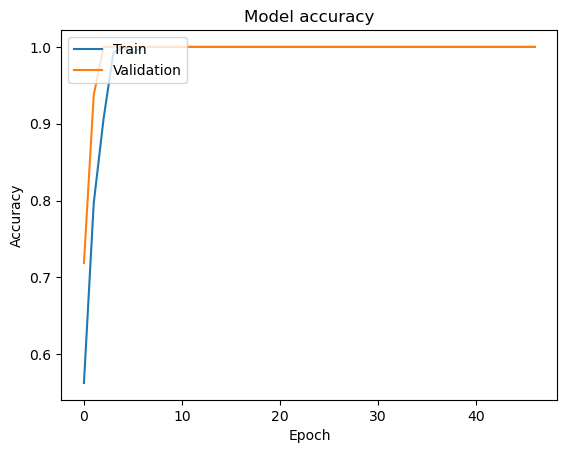

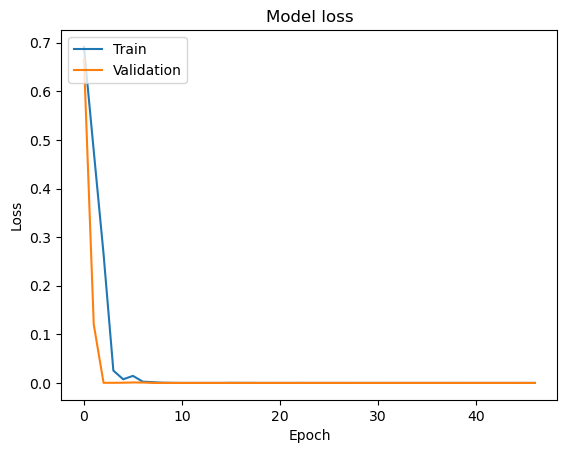

3/3 [==============================] - 0s 115ms/step - loss: 4.3322e-07 - accuracy: 1.0000
Test accuracy: 1.00, Test loss: 0.00


In [11]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# 데이터 준비
train_generator = ImageDataGenerator(rescale=1/255.0)
valid_generator = ImageDataGenerator(rescale=1/255.0)

flow_tr_gen = train_generator.flow(X_m_train, Y_m_train, batch_size=16, shuffle=True)
flow_val_gen = valid_generator.flow(X_m_val, Y_m_val, batch_size=16, shuffle=False)

# VGG16 모델 설정
IMAGE_SIZE = 250

base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), weights=None, include_top=False)

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Assuming 2 classes for the output

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 콜백 설정
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# 모델 학습
history = model.fit(
    flow_tr_gen,
    steps_per_epoch=len(X_m_train) // 16,
    validation_data=flow_val_gen,
    validation_steps=len(X_m_val) // 16,
    epochs=50,
    callbacks=[reduce_lr, early_stopping, checkpoint]
)

# 학습 결과 출력
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 테스트 데이터 평가
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(X_m_test, Y_m_test, batch_size=16, shuffle=False)

test_loss, test_acc = model.evaluate(flow_test_gen)
print(f'Test accuracy: {test_acc:.2f}, Test loss: {test_loss:.2f}')


Epoch 1/50


2024-07-26 21:25:46.292200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.5391

2024-07-26 21:25:50.477592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 5s 573ms/step - loss: 0.6927 - accuracy: 0.5391 - val_loss: 0.6869 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 2/50
8/8 [==============================] - 4s 538ms/step - loss: 0.6258 - accuracy: 0.7578 - val_loss: 0.2710 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 3/50
8/8 [==============================] - 4s 504ms/step - loss: 0.2734 - accuracy: 0.9219 - val_loss: 0.6079 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 4/50
8/8 [==============================] - 4s 533ms/step - loss: 0.2951 - accuracy: 0.8750 - val_loss: 0.1465 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/50
8/8 [==============================] - 4s 537ms/step - loss: 0.1200 - accuracy: 0.9922 - val_loss: 0.0407 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/50
8/8 [==============================] - 4s 535ms/step - loss: 0.0516 - accuracy: 0.9922 - val_loss: 6.5239e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 7/50
8/8 [==============================] - 4s 547ms/step -

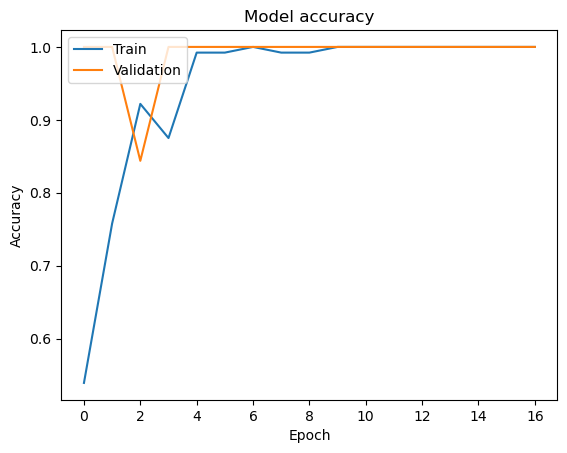

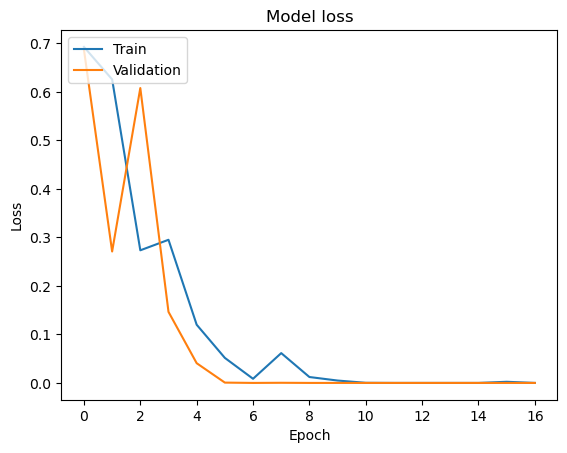

3/3 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.00, Test loss: 0.00


In [14]:

# 데이터 제너레이터 준비
train_generator = ImageDataGenerator(rescale=1/255.0)
valid_generator = ImageDataGenerator(rescale=1/255.0)
flow_tr_gen = train_generator.flow(X_m_train, Y_m_train, batch_size=16, shuffle=True)
flow_val_gen = valid_generator.flow(X_m_val, Y_m_val, batch_size=16, shuffle=False)

# VGG16 모델 설정
IMAGE_SIZE = 250

base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), weights=None, include_top=False)

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Assuming 2 classes for the output

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 콜백 설정
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# 모델 학습
history = model.fit(
    flow_tr_gen,
    steps_per_epoch=len(X_m_train) // 16,
    validation_data=flow_val_gen,
    validation_steps=len(X_m_val) // 16,
    epochs=50,
    callbacks=[reduce_lr, early_stopping, checkpoint]
)

# 학습 결과 출력
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 테스트 데이터 평가
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(X_m_test, Y_m_test, batch_size=16, shuffle=False)

test_loss, test_acc = model.evaluate(flow_test_gen)
print(f'Test accuracy: {test_acc:.2f}, Test loss: {test_loss:.2f}')

Epoch 1/50


2024-07-26 21:21:35.413478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 0.6746 - accuracy: 0.5781

2024-07-26 21:21:39.725957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 5s 596ms/step - loss: 0.6746 - accuracy: 0.5781 - val_loss: 0.5998 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 2/50
8/8 [==============================] - 4s 538ms/step - loss: 0.4816 - accuracy: 0.8438 - val_loss: 0.2585 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 3/50
8/8 [==============================] - 4s 551ms/step - loss: 0.2881 - accuracy: 0.8984 - val_loss: 0.2391 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 4/50
8/8 [==============================] - 4s 544ms/step - loss: 0.2298 - accuracy: 0.9141 - val_loss: 0.0642 - val_accuracy: 0.9688 - lr: 1.0000e-04
Epoch 5/50
8/8 [==============================] - 4s 514ms/step - loss: 0.1431 - accuracy: 0.9297 - val_loss: 0.1424 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 6/50
8/8 [==============================] - 4s 561ms/step - loss: 0.1490 - accuracy: 0.9375 - val_loss: 0.0864 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 7/50
8/8 [==============================] - 4s 542ms/step - los

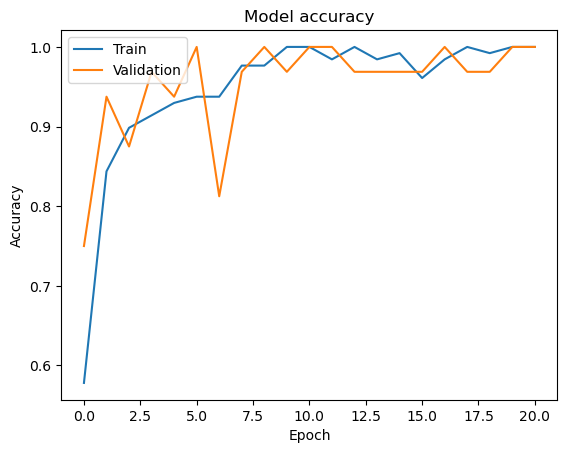

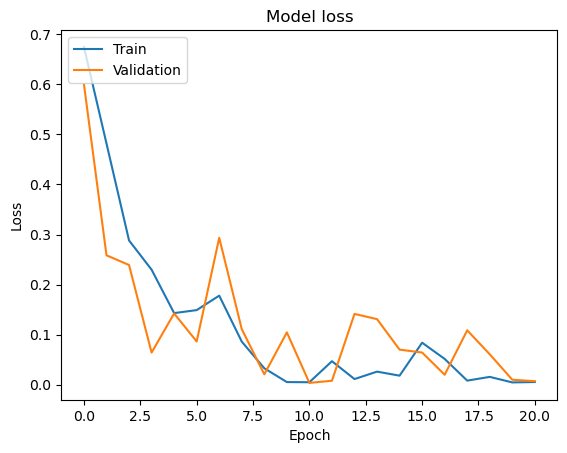

3/3 [==============================] - 0s 125ms/step - loss: 0.0236 - accuracy: 0.9756
Test accuracy: 0.98, Test loss: 0.02


In [13]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# 데이터 준비
train_generator = ImageDataGenerator(rescale=1/255.0)
valid_generator = ImageDataGenerator(rescale=1/255.0)

flow_tr_gen = train_generator.flow(X_p_train, Y_p_train, batch_size=16, shuffle=True)
flow_val_gen = valid_generator.flow(X_p_val, Y_p_val, batch_size=16, shuffle=False)

# VGG16 모델 설정
IMAGE_SIZE = 250

base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), weights=None, include_top=False)

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Assuming 2 classes for the output

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 콜백 설정
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# 모델 학습
history = model.fit(
    flow_tr_gen,
    steps_per_epoch=len(X_p_train) // 16,
    validation_data=flow_val_gen,
    validation_steps=len(X_p_val) // 16,
    epochs=50,
    callbacks=[reduce_lr, early_stopping, checkpoint]
)

# 학습 결과 출력
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 테스트 데이터 평가
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(X_p_test, Y_p_test, batch_size=16, shuffle=False)

test_loss, test_acc = model.evaluate(flow_test_gen)
print(f'Test accuracy: {test_acc:.2f}, Test loss: {test_loss:.2f}')


(128, 250, 250, 1) (41, 250, 250, 1) (128, 2) (41, 2)
Epoch 1/50


2024-07-26 21:32:32.503205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.4531

2024-07-26 21:32:36.807492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 6s 585ms/step - loss: 0.6941 - accuracy: 0.4531 - val_loss: 0.6926 - val_accuracy: 0.5312 - lr: 1.0000e-04
Epoch 2/50
8/8 [==============================] - 4s 558ms/step - loss: 0.6914 - accuracy: 0.5859 - val_loss: 0.6815 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 3/50
8/8 [==============================] - 4s 555ms/step - loss: 0.5457 - accuracy: 0.8203 - val_loss: 0.1238 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 4/50
8/8 [==============================] - 4s 561ms/step - loss: 0.3122 - accuracy: 0.8984 - val_loss: 9.2487e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/50
8/8 [==============================] - 4s 514ms/step - loss: 0.0802 - accuracy: 0.9844 - val_loss: 0.0174 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/50
8/8 [==============================] - 4s 520ms/step - loss: 0.0575 - accuracy: 0.9766 - val_loss: 0.0054 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 7/50
8/8 [==============================] - 4s 519ms/step -

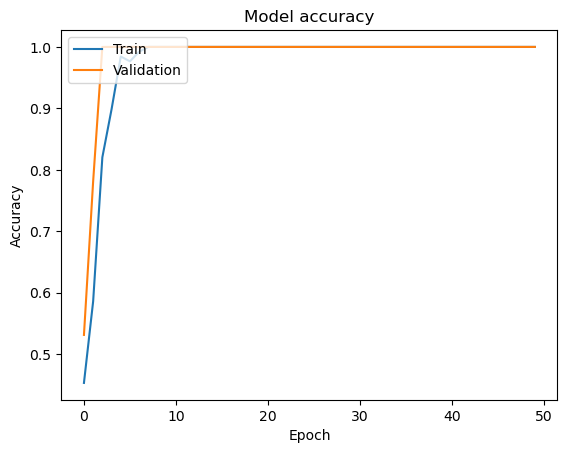

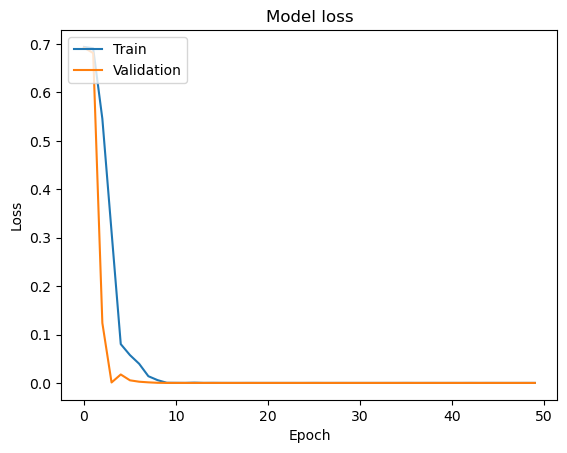

3/3 [==============================] - 0s 131ms/step - loss: 8.2864e-07 - accuracy: 1.0000
Test accuracy: 1.00, Test loss: 0.00
2/3 [===================>..........] - ETA: 0s

2024-07-26 21:36:10.316702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 122ms/step


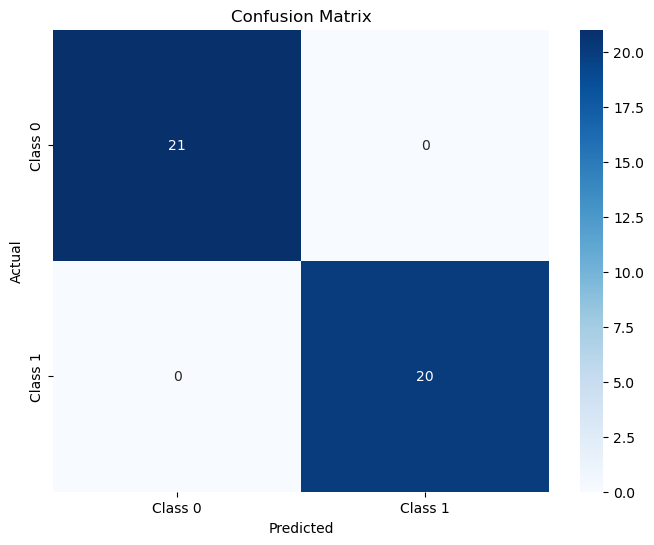

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        21
     Class 1       1.00      1.00      1.00        20

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [15]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers.legacy import Adam  # 레거시 최적화기 사용
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분할
X_m_train, X_m_test, Y_m_train, Y_m_test = train_test_split(X_m, Y, test_size=0.2, stratify=Y)
X_m_train, X_m_val, Y_m_train, Y_m_val = train_test_split(X_m_train, Y_m_train, test_size=0.2, stratify=Y_m_train)

print(X_m_train.shape, X_m_test.shape, Y_m_train.shape, Y_m_test.shape)

# 데이터 제너레이터 준비
train_generator = ImageDataGenerator(rescale=1/255.0)
valid_generator = ImageDataGenerator(rescale=1/255.0)
flow_tr_gen = train_generator.flow(X_m_train, Y_m_train, batch_size=16, shuffle=True)
flow_val_gen = valid_generator.flow(X_m_val, Y_m_val, batch_size=16, shuffle=False)

# VGG16 모델 설정
IMAGE_SIZE = 250

base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), weights=None, include_top=False)

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Assuming 2 classes for the output

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 콜백 설정
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# 모델 학습
history = model.fit(
    flow_tr_gen,
    steps_per_epoch=len(X_m_train) // 16,
    validation_data=flow_val_gen,
    validation_steps=len(X_m_val) // 16,
    epochs=50,
    callbacks=[reduce_lr, early_stopping, checkpoint]
)

# 학습 결과 출력
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 테스트 데이터 평가
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(X_m_test, Y_m_test, batch_size=16, shuffle=False)

test_loss, test_acc = model.evaluate(flow_test_gen)
print(f'Test accuracy: {test_acc:.2f}, Test loss: {test_loss:.2f}')

# 예측값 생성
Y_pred = model.predict(flow_test_gen)a
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_m_test, axis=1)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 분류 보고서 출력
class_report = classification_report(Y_true, Y_pred_classes, target_names=['Class 0', 'Class 1'])
print(class_report)


(128, 250, 250, 1) (41, 250, 250, 1) (128, 2) (41, 2)
Epoch 1/50


2024-07-26 21:36:21.154540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5000

2024-07-26 21:36:25.493758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 5s 593ms/step - loss: 0.6919 - accuracy: 0.5000 - val_loss: 0.6745 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/50
8/8 [==============================] - 4s 547ms/step - loss: 0.6182 - accuracy: 0.5625 - val_loss: 0.3265 - val_accuracy: 0.9688 - lr: 1.0000e-04
Epoch 3/50
8/8 [==============================] - 4s 560ms/step - loss: 0.4093 - accuracy: 0.8516 - val_loss: 0.1412 - val_accuracy: 0.9688 - lr: 1.0000e-04
Epoch 4/50
8/8 [==============================] - 5s 577ms/step - loss: 0.2878 - accuracy: 0.9062 - val_loss: 0.0173 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/50
8/8 [==============================] - 4s 555ms/step - loss: 0.3103 - accuracy: 0.9375 - val_loss: 0.0290 - val_accuracy: 0.9688 - lr: 1.0000e-04
Epoch 6/50
8/8 [==============================] - 4s 550ms/step - loss: 0.1464 - accuracy: 0.9531 - val_loss: 0.0381 - val_accuracy: 0.9688 - lr: 1.0000e-04
Epoch 7/50
8/8 [==============================] - 4s 530ms/step - los

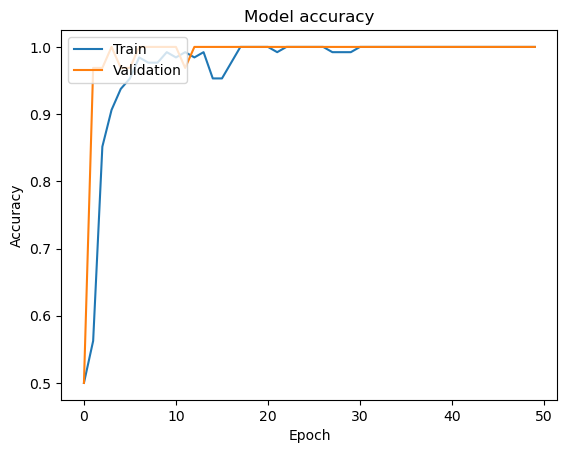

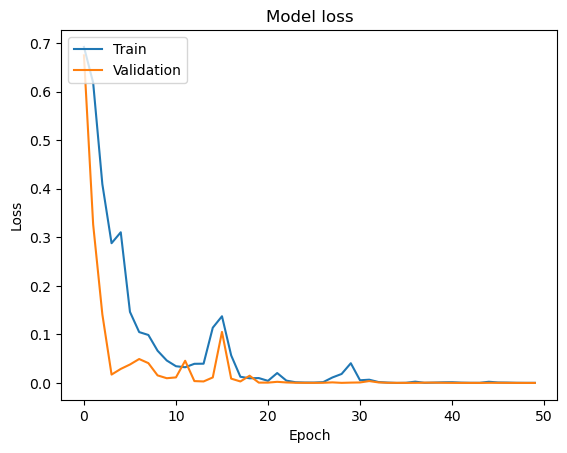

3/3 [==============================] - 0s 140ms/step - loss: 0.0040 - accuracy: 1.0000
Test accuracy: 1.00, Test loss: 0.00
2/3 [===================>..........] - ETA: 0s

2024-07-26 21:39:58.901147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 121ms/step


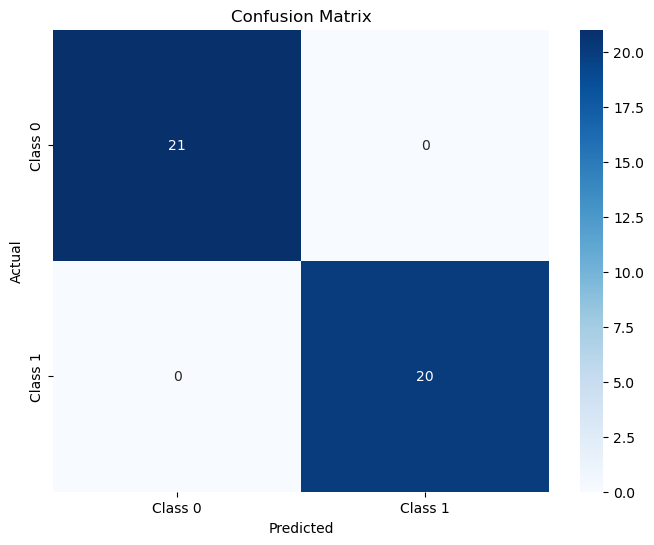

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        21
     Class 1       1.00      1.00      1.00        20

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [16]:

# 데이터 분할
X_p_train, X_p_test, Y_p_train, Y_p_test = train_test_split(X_p, Y, test_size=0.2, stratify=Y)
X_p_train, X_p_val, Y_p_train, Y_p_val = train_test_split(X_p_train, Y_p_train, test_size=0.2, stratify=Y_p_train)

print(X_p_train.shape, X_p_test.shape, Y_p_train.shape, Y_p_test.shape)

# 데이터 제너레이터 준비
train_generator = ImageDataGenerator(rescale=1/255.0)
valid_generator = ImageDataGenerator(rescale=1/255.0)
flow_tr_gen = train_generator.flow(X_p_train, Y_p_train, batch_size=16, shuffle=True)
flow_val_gen = valid_generator.flow(X_p_val, Y_p_val, batch_size=16, shuffle=False)

# VGG16 모델 설정
IMAGE_SIZE = 250

base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), weights=None, include_top=False)

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Assuming 2 classes for the output

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 콜백 설정
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# 모델 학습
history = model.fit(
    flow_tr_gen,
    steps_per_epoch=len(X_p_train) // 16,
    validation_data=flow_val_gen,
    validation_steps=len(X_p_val) // 16,
    epochs=50,
    callbacks=[reduce_lr, early_stopping, checkpoint]
)

# 학습 결과 출력
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 테스트 데이터 평가
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(X_p_test, Y_p_test, batch_size=16, shuffle=False)

test_loss, test_acc = model.evaluate(flow_test_gen)
print(f'Test accuracy: {test_acc:.2f}, Test loss: {test_loss:.2f}')

# 예측값 생성
Y_pred = model.predict(flow_test_gen)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_p_test, axis=1)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 분류 보고서 출력
class_report = classification_report(Y_true, Y_pred_classes, target_names=['Class 0', 'Class 1'])
print(class_report)
